In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi, cos, sin

The following code prepares our circuit for the angle 0.7 rad

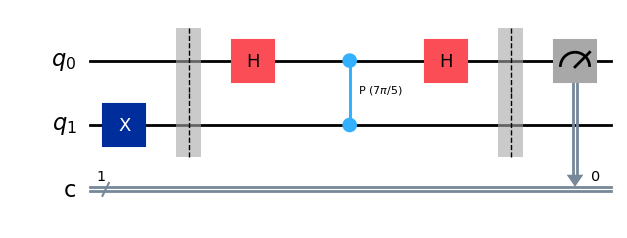

In [2]:
theta = 0.7  # Can be changed to any value between 0 and 1
qc = QuantumCircuit(2, 1)

# Prepare the eigenvector, which is the |1> state
qc.x(1)
qc.barrier()

# Implement the estimation procedure
qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

# Perform the final measurement
qc.measure(0, 0)

# Draw the circuit
display(qc.draw(output="mpl"))

We can simulate the circuit using the `Aer` simulator to see how the probabilities are affected by the angle

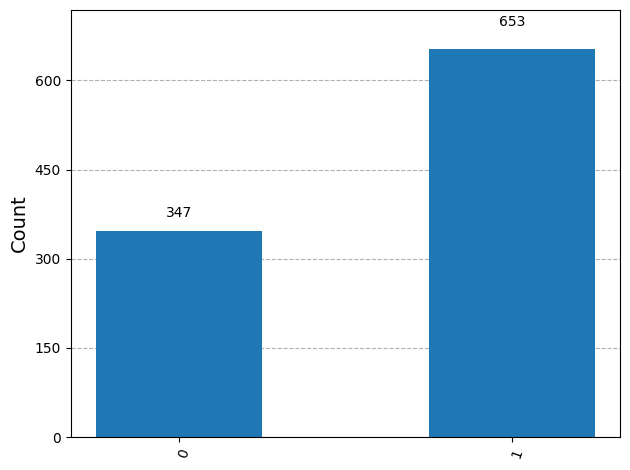

In [3]:
result = AerSimulator().run(qc, shots = 1000).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

Comparing to our predicted values:

In [4]:
print(f"cos(pi * {theta})**2 = {cos(pi * theta) ** 2:.4f}")
print(f"sin(pi * {theta})**2 = {sin(pi * theta) ** 2:.4f}")

cos(pi * 0.7)**2 = 0.3455
sin(pi * 0.7)**2 = 0.6545


Next, we can implement a simple inverse of the two-qubit QFT

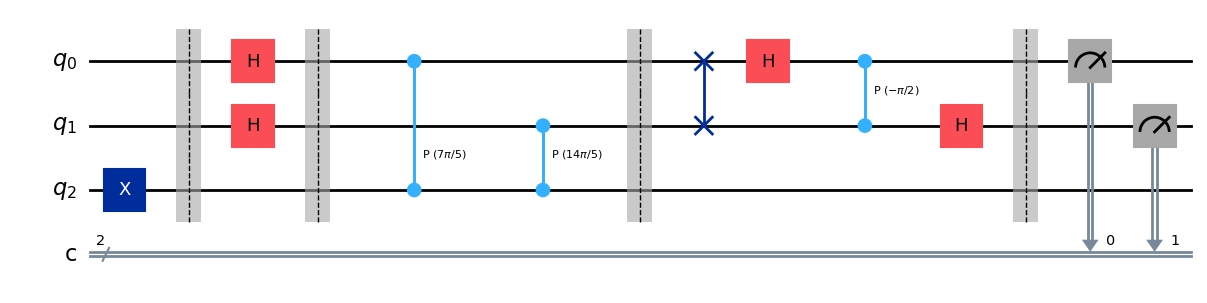

In [5]:
theta = 0.7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# The initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# The controlled unitary gates
qc.cp(2 * pi * theta, 0, 2)
qc.cp(2 * pi * (2 * theta), 1, 2)
qc.barrier()

# An implementation of the inverse of the two-qubit QFT
qc.swap(0, 1)
qc.h(0)
qc.cp(-pi / 2, 0, 1)
qc.h(1)
qc.barrier()

# And finally the measurements
qc.measure([0, 1], [0, 1])
display(qc.draw(output="mpl"))

Afterwards, our simulation is telling

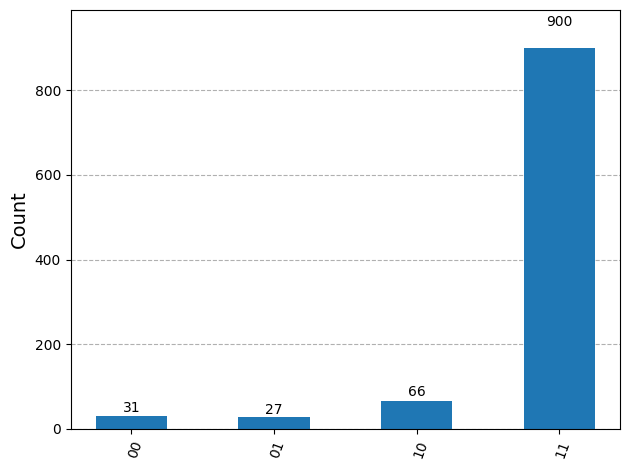

In [6]:
result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))